## Task #1: Hierarchical Clustering

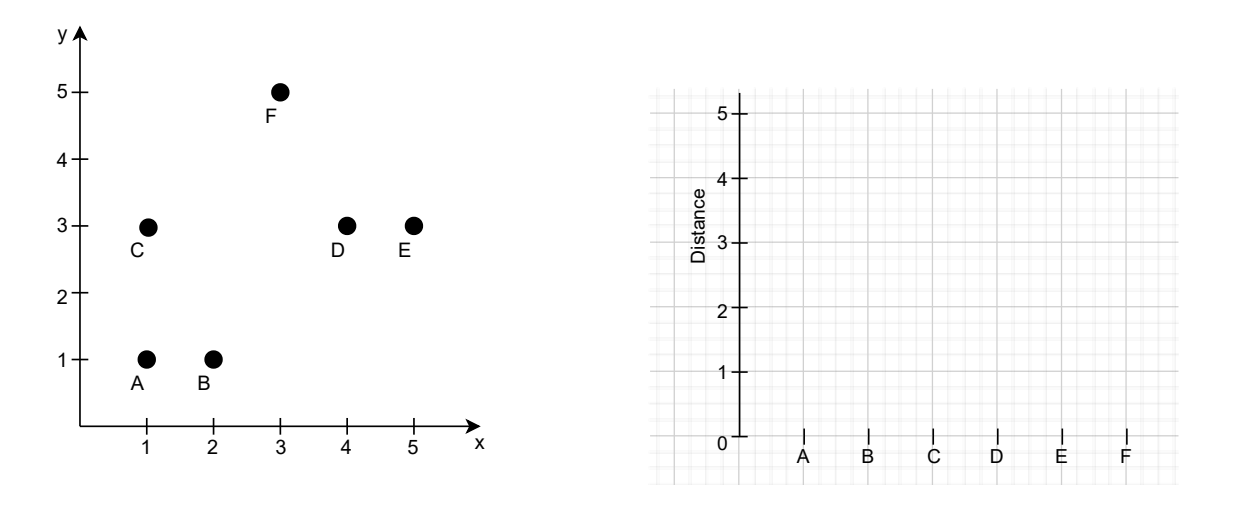

a) You want to cluster the six points seen above. You decide that you want to create a dendrogram using Manhatten distance and average linkage. How does the resulting dendrogram look like? Complete the template given above!

#### Answer

**Manhatten distance**
: a metric used to determine the distance between two points in a grid-like path
- measures the sum of the absolute differences between the coordinates of the points

**Euclidean distance**
- measures the shortest possible line between two points

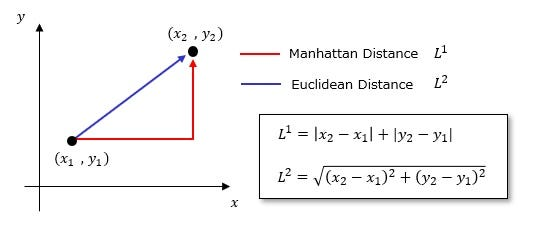

**Average Linkage**
: the distance between two clusters is the average distance between each cluster’s point to every point in the other cluster
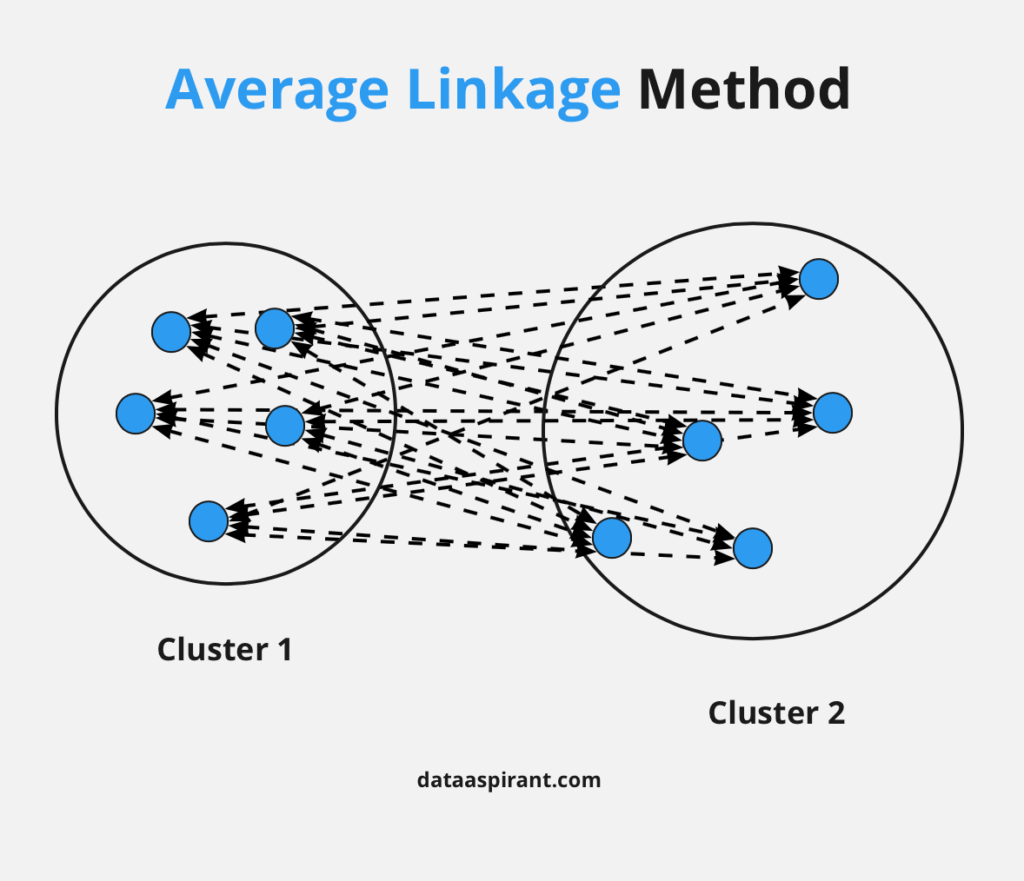

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

In [2]:
dt = [[(1, 1), 'A'], [(2, 1), 'B'], [(1, 3), 'C'], [(4, 3), 'D'], [(5, 3), 'E'], [(3, 5), 'F']]
df = pd.DataFrame(data=dt)
df.columns = ['Coordinates', 'Datapoint']
df

,Coordinates,Datapoint
0,"(1, 1)",A
1,"(2, 1)",B
2,"(1, 3)",C
3,"(4, 3)",D
4,"(5, 3)",E
5,"(3, 5)",F


In [3]:
# Extract coordinates as NumPy array
coords = np.array(df['Coordinates'].tolist())
coords

array([[1, 1],
       [2, 1],
       [1, 3],
       [4, 3],
       [5, 3],
       [3, 5]])

In [4]:
# Compute Manhattan distances and apply hierarchical clustering
manhattan_dist = pdist(coords, metric='cityblock')
linkage_matrix1 = linkage(manhattan_dist, method='average')

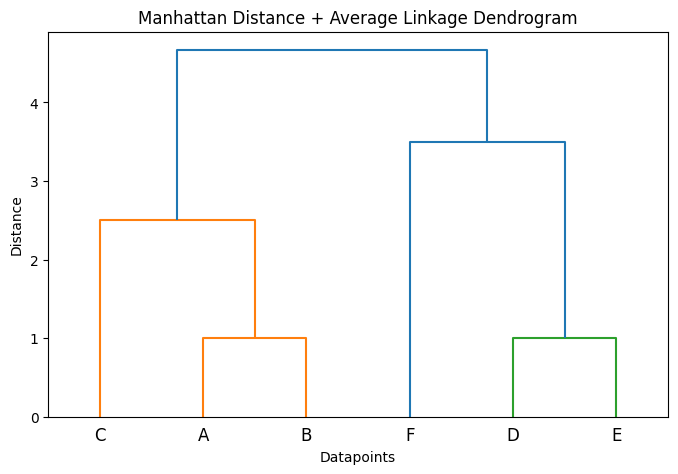

In [5]:
# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix1, labels=df['Datapoint'].values)
plt.title("Manhattan Distance + Average Linkage Dendrogram")
plt.xlabel("Datapoints")
plt.ylabel("Distance")
plt.show()

*병합과정

In [6]:
# 각 데이터포인트 이름
labels = df['Datapoint'].tolist()
num_points = len(labels)

print("🔍 클러스터 병합 순서:")

for i, (c1, c2, dist, count) in enumerate(linkage_matrix1):
    # 인덱스가 원래 데이터 범위 내이면 원래 점
    def label(x):
        return labels[int(x)] if x < num_points else f"Cluster_{int(x)}"

    print(f"Step {i+1}: {label(c1)} 와 {label(c2)} 를 거리 {dist:.2f}에서 병합 → 새 클러스터: Cluster_{num_points + i}")

🔍 클러스터 병합 순서:
Step 1: A 와 B 를 거리 1.00에서 병합 → 새 클러스터: Cluster_6
Step 2: D 와 E 를 거리 1.00에서 병합 → 새 클러스터: Cluster_7
Step 3: C 와 Cluster_6 를 거리 2.50에서 병합 → 새 클러스터: Cluster_8
Step 4: F 와 Cluster_7 를 거리 3.50에서 병합 → 새 클러스터: Cluster_9
Step 5: Cluster_8 와 Cluster_9 를 거리 4.67에서 병합 → 새 클러스터: Cluster_10


*각 클러스터에 어떤 점이 들어가는지?

In [7]:
# 덴드로그램을 2개의 클러스터로 자르기
cluster_assignments = fcluster(linkage_matrix1, t=2,
                               criterion='maxclust')

# 클러스터 결과를 DataFrame으로 정리
df['Cluster'] = cluster_assignments

# 클러스터별 출력
for cluster_id in sorted(df['Cluster'].unique()):
    members = df[df['Cluster'] == cluster_id]
    print(f"\n🔹 Cluster {cluster_id}:")
    for _, row in members.iterrows():
        print(f" - {row['Datapoint']} at {row['Coordinates']}")


🔹 Cluster 1:
 - A at (1, 1)
 - B at (2, 1)
 - C at (1, 3)

🔹 Cluster 2:
 - D at (4, 3)
 - E at (5, 3)
 - F at (3, 5)


b) You want to cluster the same six points, but using maximum norm and complete linkage. How does the resulting dendrogram look like? Complete the template below!

#### Answer

**Maximum norm(Chebyshev distance)**

$d(p,q) = max(|x_1-x_2|, |y_1, y_2|)$

: x, y 중 더 큰 축의 차이만 반영하는 거리

**Complete Linkage**
: 두 클러스터 안의 가장 먼 점들 사이의 거리를 기준으로 병합
- 가장 가까운 두 점/기존 클러스터와 점 사이 거리 비교 후 병합
- 모든 점이 하나의 클러스터가 될 때까지 반복

In [8]:
# Chebyshev 거리 계산 + complete linkage 적용
chebyshev_dist = pdist(coords, metric='chebyshev')
linkage_matrix2 = linkage(chebyshev_dist, method='complete')

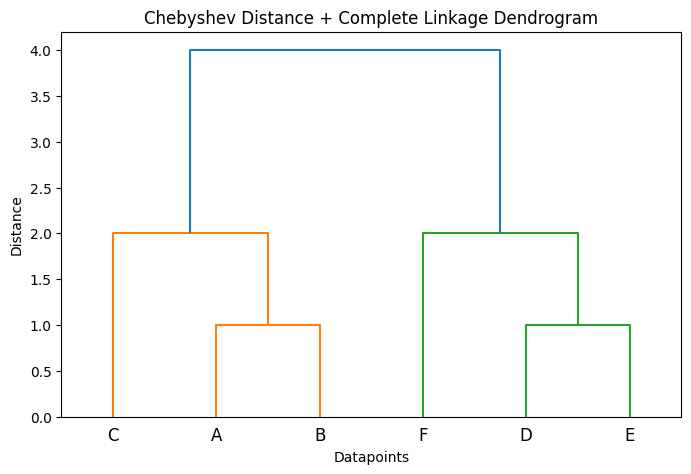

In [9]:
# 덴드로그램 시각화
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix2, labels=df['Datapoint'].values)
plt.title("Chebyshev Distance + Complete Linkage Dendrogram")
plt.xlabel("Datapoints")
plt.ylabel("Distance")
plt.show()

*병합 과정

In [10]:
# 각 데이터포인트 이름
labels = df['Datapoint'].tolist()
num_points = len(labels)

print("🔍 클러스터 병합 순서:")

for i, (c1, c2, dist, count) in enumerate(linkage_matrix2):
    # 인덱스가 원래 데이터 범위 내이면 원래 점
    def label(x):
        return labels[int(x)] if x < num_points else f"Cluster_{int(x)}"

    print(f"Step {i+1}: {label(c1)} 와 {label(c2)} 를 거리 {dist:.2f}에서 병합 → 새 클러스터: Cluster_{num_points + i}")

🔍 클러스터 병합 순서:
Step 1: A 와 B 를 거리 1.00에서 병합 → 새 클러스터: Cluster_6
Step 2: D 와 E 를 거리 1.00에서 병합 → 새 클러스터: Cluster_7
Step 3: C 와 Cluster_6 를 거리 2.00에서 병합 → 새 클러스터: Cluster_8
Step 4: F 와 Cluster_7 를 거리 2.00에서 병합 → 새 클러스터: Cluster_9
Step 5: Cluster_8 와 Cluster_9 를 거리 4.00에서 병합 → 새 클러스터: Cluster_10


*각 클러스터에 어떤 점이 들어가는지?

In [11]:
# 덴드로그램을 2개의 클러스터로 자르기
cluster_assignments = fcluster(linkage_matrix2, t=2,
                               criterion='maxclust')

# 클러스터 결과를 DataFrame으로 정리
df['Cluster'] = cluster_assignments

# 클러스터별 출력
for cluster_id in sorted(df['Cluster'].unique()):
    members = df[df['Cluster'] == cluster_id]
    print(f"\n🔹 Cluster {cluster_id}:")
    for _, row in members.iterrows():
        print(f" - {row['Datapoint']} at {row['Coordinates']}")


🔹 Cluster 1:
 - A at (1, 1)
 - B at (2, 1)
 - C at (1, 3)

🔹 Cluster 2:
 - D at (4, 3)
 - E at (5, 3)
 - F at (3, 5)


c) You want two clusters to be formed with maximum norm and complete linkage. What distance do you have to choose? What points are in the clusters?

#### Answer

- Distance Choice
    - When we use maximum norm, we have to choose **Chebychev Distance**.
- Datapoints
    - For Cluster #1, there are datapoints **A, B, and C**.
    - For Cluster #2, there are datapoints **D, E, and F**.

## Task #2: Clustering with DBSCAN

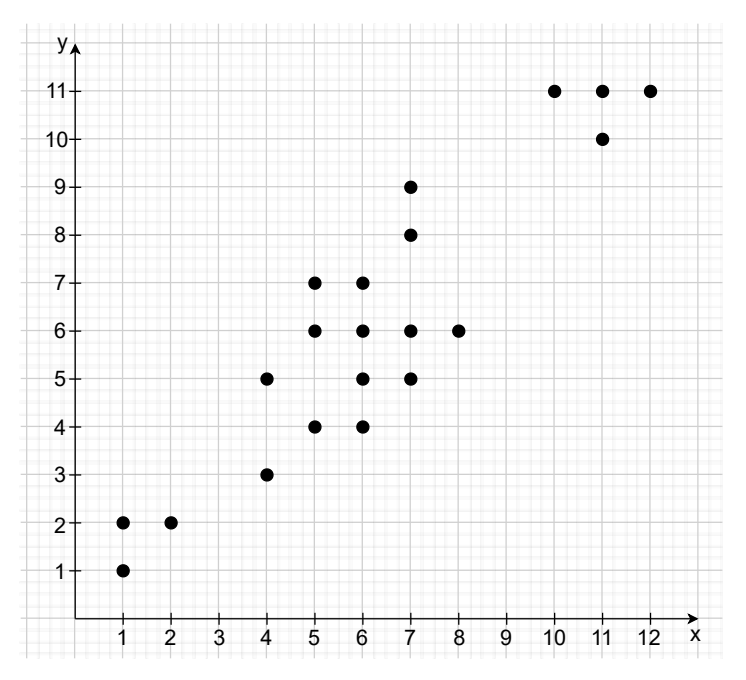

a) You want to cluster the points seen above. You decide that you want to use the density based clustering-algorithm DBSCAN. How would a clustering with $minPts = 4$ and $ϵ = 2$ look like? Add the clusters to the Figure above. (Use Euclidean distance.)

- $minPts$: 한 점이 클러스터의 중심이 되기 위해 필요한 **이웃의 수**
- $ϵ$: 이웃이라고 간주되기 위한 기준이 되는 **거리**

#### DBSCAN
밀도 기반 클러스터링 알고리즘.

조밀하게 *모여있는* 점들은 같은 cluster로,
*주변에 이웃이 없는* 점들은 noise로 간주

- 작동 방식
    - **core point**: 주변 epsilon 거리 안에 minPts 이상의 점이 있으면 core point로 간주됨.
    - **border point**: 자기 자신이 core point는 아니지만, core point 근처에 있으면 border point
    - **noise**: core point도, border point도 아닌 점

#### Euclidean distance
$d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

In [12]:
from sklearn.cluster import DBSCAN

In [19]:
points = {
    'A': (1, 1), 'B': (1, 2), 'C': (2, 2), 'D': (4, 3), 'E': (4, 5), 'F': (5, 4),
    'G': (5, 6), 'H': (5, 7), 'I': (6, 4), 'J': (6, 5), 'K': (6, 6), 'L': (6, 7),
    'M': (7, 5), 'N': (7, 6), 'O': (7, 8), 'P': (7, 9), 'Q': (8, 6),
    'R': (10, 11), 'S': (11, 10), 'T': (11, 11), 'U': (12, 11)
}

data2 = [[name, coord] for name, coord in points.items()]
col_name = ['Datapoint', 'Coordinates']

# DataFrame 생성
df2 = pd.DataFrame(data=data2, columns=col_name)
df2.head()

,Datapoint,Coordinates
0,A,"(1, 1)"
1,B,"(1, 2)"
2,C,"(2, 2)"
3,D,"(4, 3)"
4,E,"(4, 5)"


In [25]:
# DBSCAN은 숫자로 된 배열이 필요. 따라서 튜플->숫자 배열로 변환
coords = np.array(df2['Coordinates'].tolist())

In [43]:
# epsilon 값 = eps, minPts 값 = min_samples
# Euclidean distance = metric 옵션 뒤에 넣기
db = DBSCAN(eps=2, min_samples=4, metric='euclidean')
cluster_labels = db.fit_predict(coords)

In [44]:
df2['Cluster'] = cluster_labels

이때, -1은 noise값. Cluster number는 0부터 시작

<ipython-input-45-1da8cc0a9e50>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


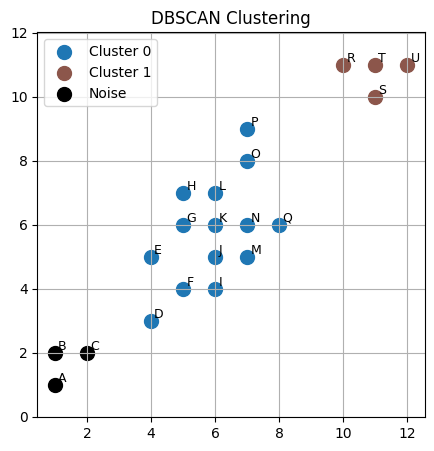

In [45]:
# 시각화
x = coords[:, 0]
y = coords[:, 1]

plt.figure(figsize=(5, 5))
unique_labels = set(cluster_labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    color = 'k' if label == -1 else colors(label)
    mask = (cluster_labels == label)
    plt.scatter(x[mask], y[mask], c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', s=100)

# 각 점 이름 표시
for i in range(len(df2)):
    name = df2.loc[i, 'Datapoint']
    x_pos, y_pos = df2.loc[i, 'Coordinates']
    plt.text(x_pos + 0.1, y_pos + 0.1, name, fontsize=9)

plt.title('DBSCAN Clustering')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [46]:
# minPts값과 epsilon값을 넣었을 때, 클러스터링을 수행하고 시각화까지 하는 함수 생성
def generatePlot(df, epsilon, minPts):
    coords = np.array(df['Coordinates'].tolist())

    db = DBSCAN(eps=epsilon, min_samples=minPts, metric='euclidean')
    cluster_labels = db.fit_predict(coords)

    df['Cluster'] = cluster_labels

    x = coords[:, 0]
    y = coords[:, 1]

    plt.figure(figsize=(5, 5))
    unique_labels = set(cluster_labels)
    colors = plt.cm.get_cmap("tab10", len(unique_labels))

    for label in unique_labels:
        color = 'k' if label == -1 else colors(label)
        mask = (cluster_labels == label)
        plt.scatter(x[mask], y[mask], c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', s=100)

    # 각 점 이름 표시
    for i in range(len(df)):
        name = df.loc[i, 'Datapoint']
        x_pos, y_pos = df.loc[i, 'Coordinates']
        plt.text(x_pos + 0.1, y_pos + 0.1, name, fontsize=9)

    plt.title('DBSCAN Clustering')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

<ipython-input-46-794a4135c774>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


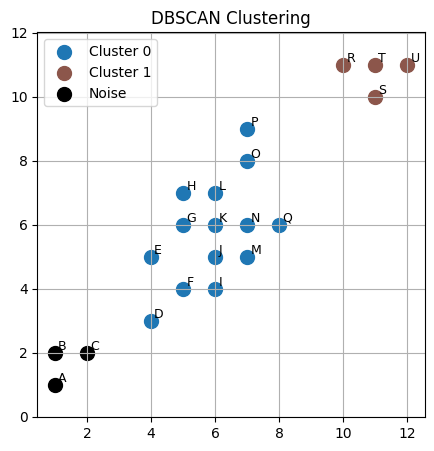

In [47]:
generatePlot(df2, 2, 4)

b) You are not yet happy with the clustering result. So you can try again with minPts=3 and eps=1. How does the result look like? Add the clusters to the picture below.

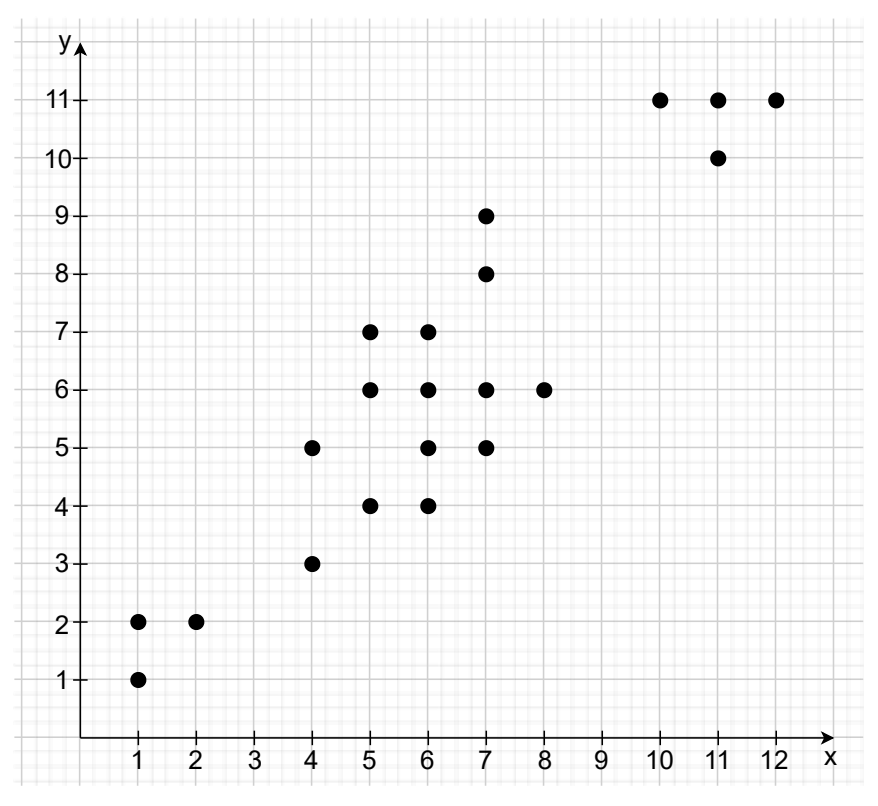

<ipython-input-46-794a4135c774>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


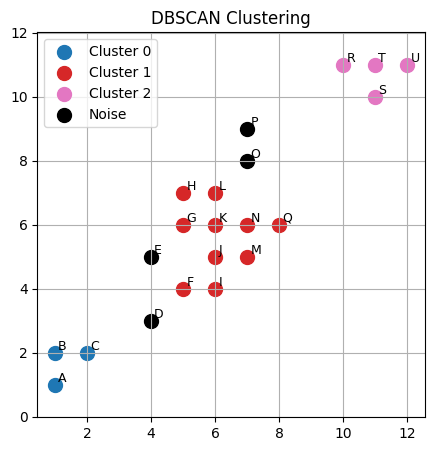

In [48]:
generatePlot(df2, 1, 3)

c) How do you have to choose minPts and epsilon so that three clusters are formed and not a single point is classified as noise?

<ipython-input-46-794a4135c774>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


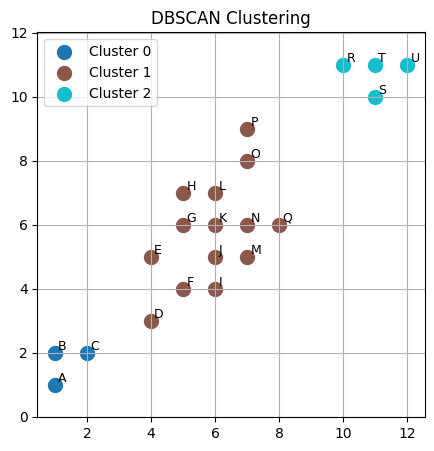

In [49]:
generatePlot(df2, 2, 3)

작은 데이터 포인트도 core/border point로 인정되도록 하기 위해서, 이웃의 수(minPts)를 3 정도로 조정한다. 또한, 거리(epsilon)의 경우 2 정도로 조정하여 최대한 많은 데이터 포인트들이 포함될 수 있도록 한다.